<a href="https://colab.research.google.com/github/Ankita-data-T/100-small-projects/blob/main/Facebook_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df =pd.read_csv('/content/Live.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [65]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [66]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [68]:
zero_count=df.eq(0).sum()
print(zero_count)

status_id              0
status_type            0
status_published       0
num_reactions        121
num_comments        2119
num_shares          3911
num_likes            126
num_loves           4230
num_wows            5308
num_hahas           5916
num_sads            6443
num_angrys          6627
dtype: int64


Iam merging num_sads and num_angrys into 1 column (negative) here as it include very few number of responses

In [69]:
df['Negative'] = (df['num_sads']+df['num_angrys'].astype('int64'))

In [70]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Negative
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0


In [71]:
df.drop(['status_id','num_sads','num_angrys'],axis=1,inplace=True)

In [72]:
df['Date_time']=pd.to_datetime(df['status_published'])


In [73]:
df['year']=df['Date_time'].dt.year

<ipython-input-74-00a8b0460097>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph=df.groupby('year').sum()


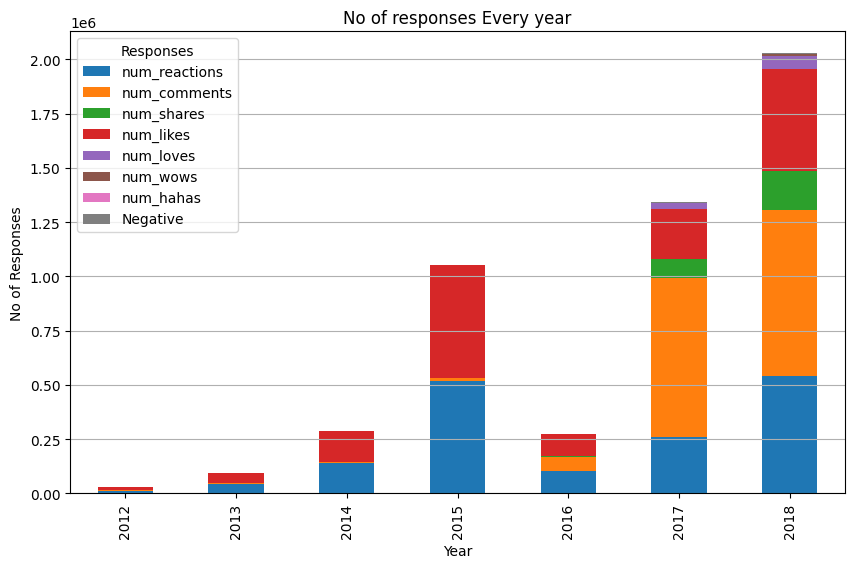

In [74]:
graph=df.groupby('year').sum()
graph.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('No of responses Every year')
plt.xlabel('Year')
plt.ylabel('No of Responses')
plt.legend(title='Responses',loc='upper left')
plt.grid(axis='y')
plt.show()

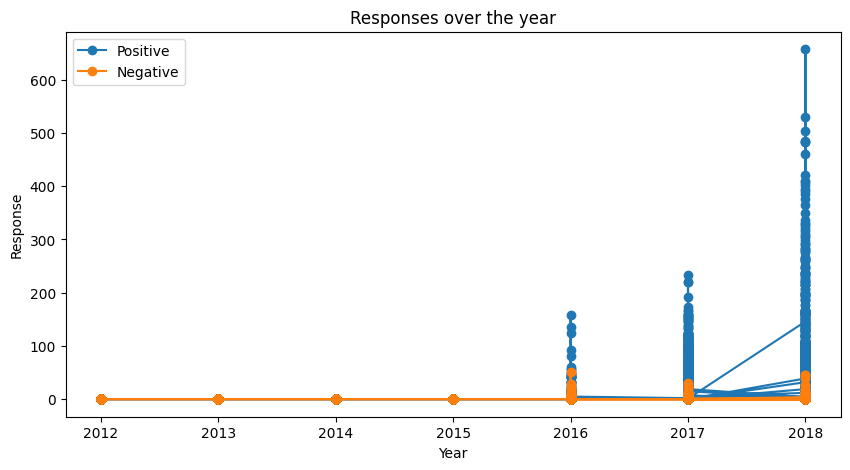

In [75]:
plt.figure(figsize=(10,5))
plt.plot(df['year'],df['num_loves'],marker='o', label='Positive', linestyle='-')
plt.plot(df['year'],df['Negative'],marker='o', label='Negative', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Response')
plt.title('Responses over the year')
plt.legend()
plt.show()

In [76]:
df_encoded=pd.get_dummies(df['status_type'],prefix='Type')
df=pd.concat([df_encoded,df['year']],axis=1)


Text(0.5, 1.0, 'Reviews on')

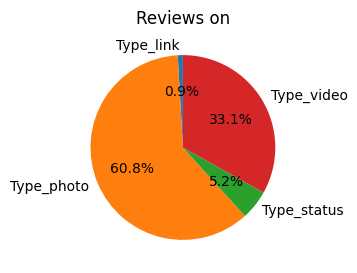

In [77]:
Content_type=df_encoded.sum()
plt.figure(figsize=(10,3))
plt.pie(Content_type,labels=Content_type.index,autopct='%1.1f%%', startangle=90)
plt.title('Reviews on')

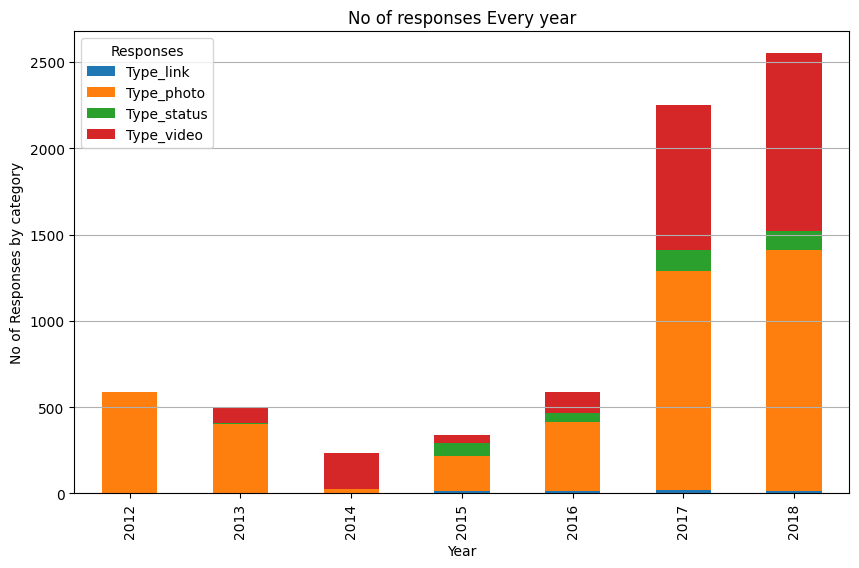

In [79]:
graph=df.groupby('year').sum()
graph.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('No of responses Every year')
plt.xlabel('Year')
plt.ylabel('No of Responses by category')
plt.legend(title='Responses',loc='upper left')
plt.grid(axis='y')
plt.show()